### Step 1: Import Libraries

In [1]:
# Data processing.
import numpy as np
import pandas as pd
import datetime as dt

# Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Import Data and Data Exploration

In [2]:
raw_df = pd.read_csv("Sample Dataset.csv")
raw_df.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


In [3]:
raw_df.tail()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
39403,2020-12-31,Thursday,19,36.85,17384,0.2,-4.02,13,-2.69,74,-3.8,100.66
39404,2020-12-31,Thursday,20,19.69,16783,-0.2,-5.59,16,-3.58,65,-6.0,100.76
39405,2020-12-31,Thursday,21,20.78,16154,-3.0,-7.44,12,-3.67,80,-6.0,100.81
39406,2020-12-31,Thursday,22,27.85,15744,-0.8,-6.76,17,-4.11,70,-5.6,100.90
39407,2020-12-31,Thursday,23,19.68,15092,-2.1,-6.21,11,-4.72,73,-6.2,100.90


The dataframe contains data from 2016 to 2020.

Next, check for missing values.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


No missing values. 

In [5]:
# Change datatype of 'Date' column from object to datetime.
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

Check outliers and abnormal values in the DataFrame.

In [6]:
raw_df.describe()

,Date,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,2018-07-20 04:30:57.003653888,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
min,2016-01-01 00:00:00,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,2017-03-31 00:00:00,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,2018-07-26 00:00:00,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,2019-11-06 00:00:00,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,2020-12-31 00:00:00,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000
std,NaN,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696


<Axes: xlabel='Date', ylabel='HOEP'>

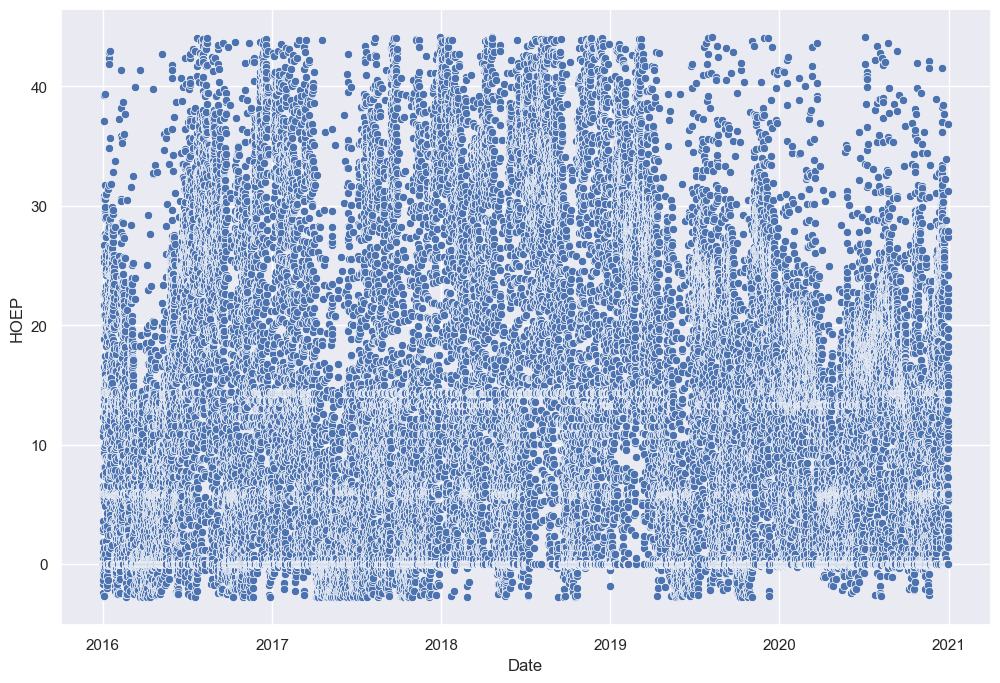

In [7]:
# Visualize HOEP values.
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x=raw_df.Date, y=raw_df['HOEP'])

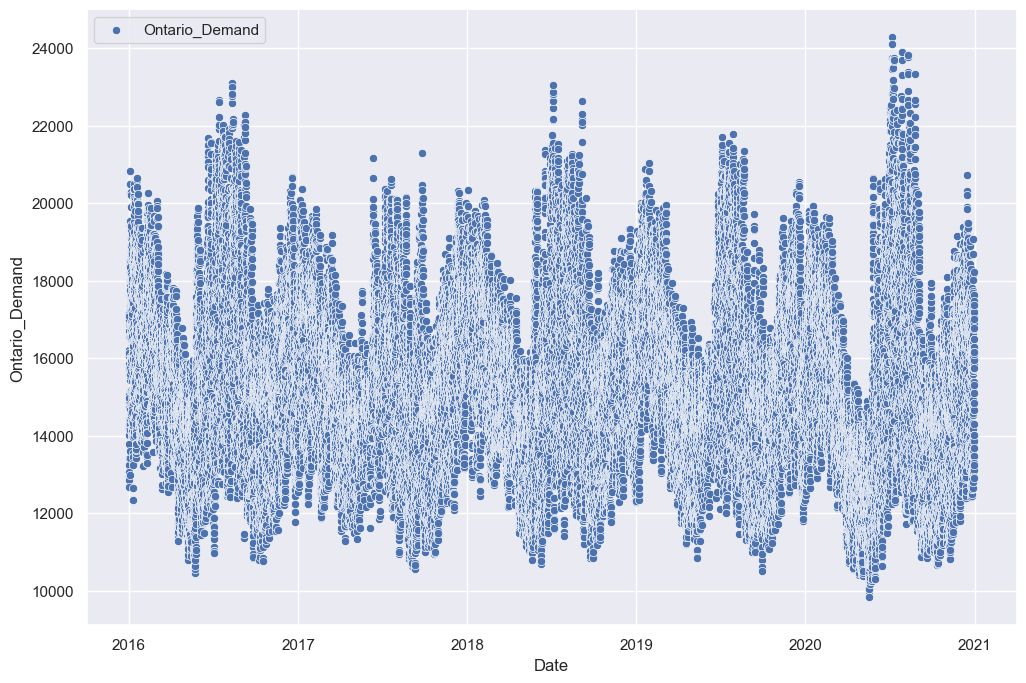

In [8]:
# Visualize Ontario_Demands.
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x=raw_df.Date, y=raw_df['Ontario_Demand'])
plt.legend(['Ontario_Demand'])

Hourly Ontario Energy Price (HOEP) has values less than zero, which is abnormal.

Therefore, we are going to fill the negative values with linear intepolation.

In [9]:
#raw_df.loc[:, 'HOEP'] = raw_df['HOEP'].apply(lambda x: np.nan if x < 0 else x)

The csv file is collecting hourly data, and there are missing hours in a day.

Therefore, need to fill the missing values (using linear combination of existing data points).

In [11]:
# Create a new DataFrame with complete date points.
hour = [hour for hour in range(24)]

# Generate a complete list of year, month, day and hour,
# then generate the date.
df = pd.DataFrame(data = {'Date': pd.date_range("2016-01-01", periods=365 * 5 + 2, freq="d"), 'Hour': [[hour for hour in range(24)]] * (365 * 5 + 2)})
df = df.explode('Hour', ignore_index=True)

# Join the complete but empty DataFrame with data DataFrame.
cleaned_df = pd.merge(df, raw_df, how="left", on = ['Date', 'Hour'])
# Combine Date and Hour column into one.
cleaned_df['Date_Time'] = cleaned_df.apply(lambda x: x['Date'] + dt.timedelta(hours=x['Hour']), axis=1)
# Change column Weekday to be binary, 0 if weekday and 1 if weekend.
cleaned_df['Weekday'] = cleaned_df['Date_Time'].apply(lambda x: 0 if x.weekday() < 5 else 1)
# Remove intermediate results from DataFrame.
cleaned_df = cleaned_df.drop(columns = ['Date', 'Hour'])
# Fill new data points with linear interpolation.
cleaned_df.loc[:, 'HOEP'] = raw_df['HOEP'].apply(lambda x: np.nan if x <= 0 else x)
cleaned_df = cleaned_df.interpolate(method='linear')

Check if there are any null values.

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43851 entries, 0 to 43850
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Weekday            43851 non-null  int64         
 1   HOEP               43851 non-null  float64       
 2   Ontario_Demand     43851 non-null  float64       
 3   Temperature        43851 non-null  float64       
 4   Windchill_Index    43851 non-null  float64       
 5   Wind_Speed         43851 non-null  float64       
 6   Humidex            43851 non-null  float64       
 7   Relative_Humidity  43851 non-null  float64       
 8   Dew_Point          43851 non-null  float64       
 9   Pressure_Station   43851 non-null  float64       
 10  Date_Time          43851 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 3.7 MB


Export the cleaned DataFrame as csv file.

In [14]:
cleaned_df.to_csv('Cleaned Dataset.csv', index = False)